In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


!pip install koreanize_matplotlib -q
import koreanize_matplotlib

# 신용카드 고객 데이터 분석

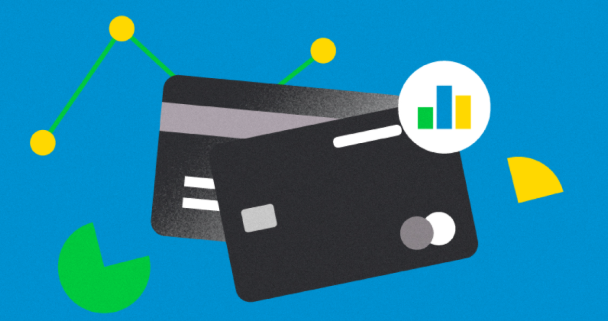

## 분석 목표

- 고객의 사용 패턴을 분석하여 고객을 그룹으로 세분화한 후 각 그룹에 맞는 마케팅 전략 수립

## 데이터 개요

In [74]:
data = pd.read_csv('/content/credit_card.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

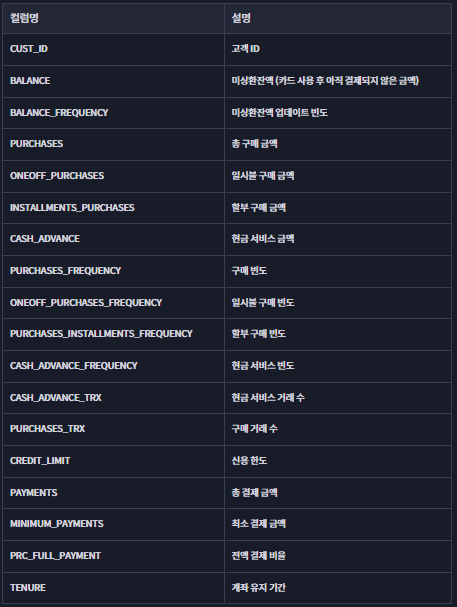

- 데이터는 약 9000명의 신용 카드 사용자들의 지난 6개월 동안의 사용형태를 요약
    - 18개의 행동변수로 구성

## 데이터 전처리

### 결측치 처리

In [50]:
data.isna().sum().sort_values(ascending=False).head()

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
BALANCE,0
CUST_ID,0
BALANCE_FREQUENCY,0


In [75]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data.isna().sum().head()

<ipython-input-75-1a0ca19711d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
<ipython-input-75-1a0ca19711d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0


### 중복값 확인

In [5]:
data.duplicated().sum()  # 중복값 없음

np.int64(0)

### 이상치 처리

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [76]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

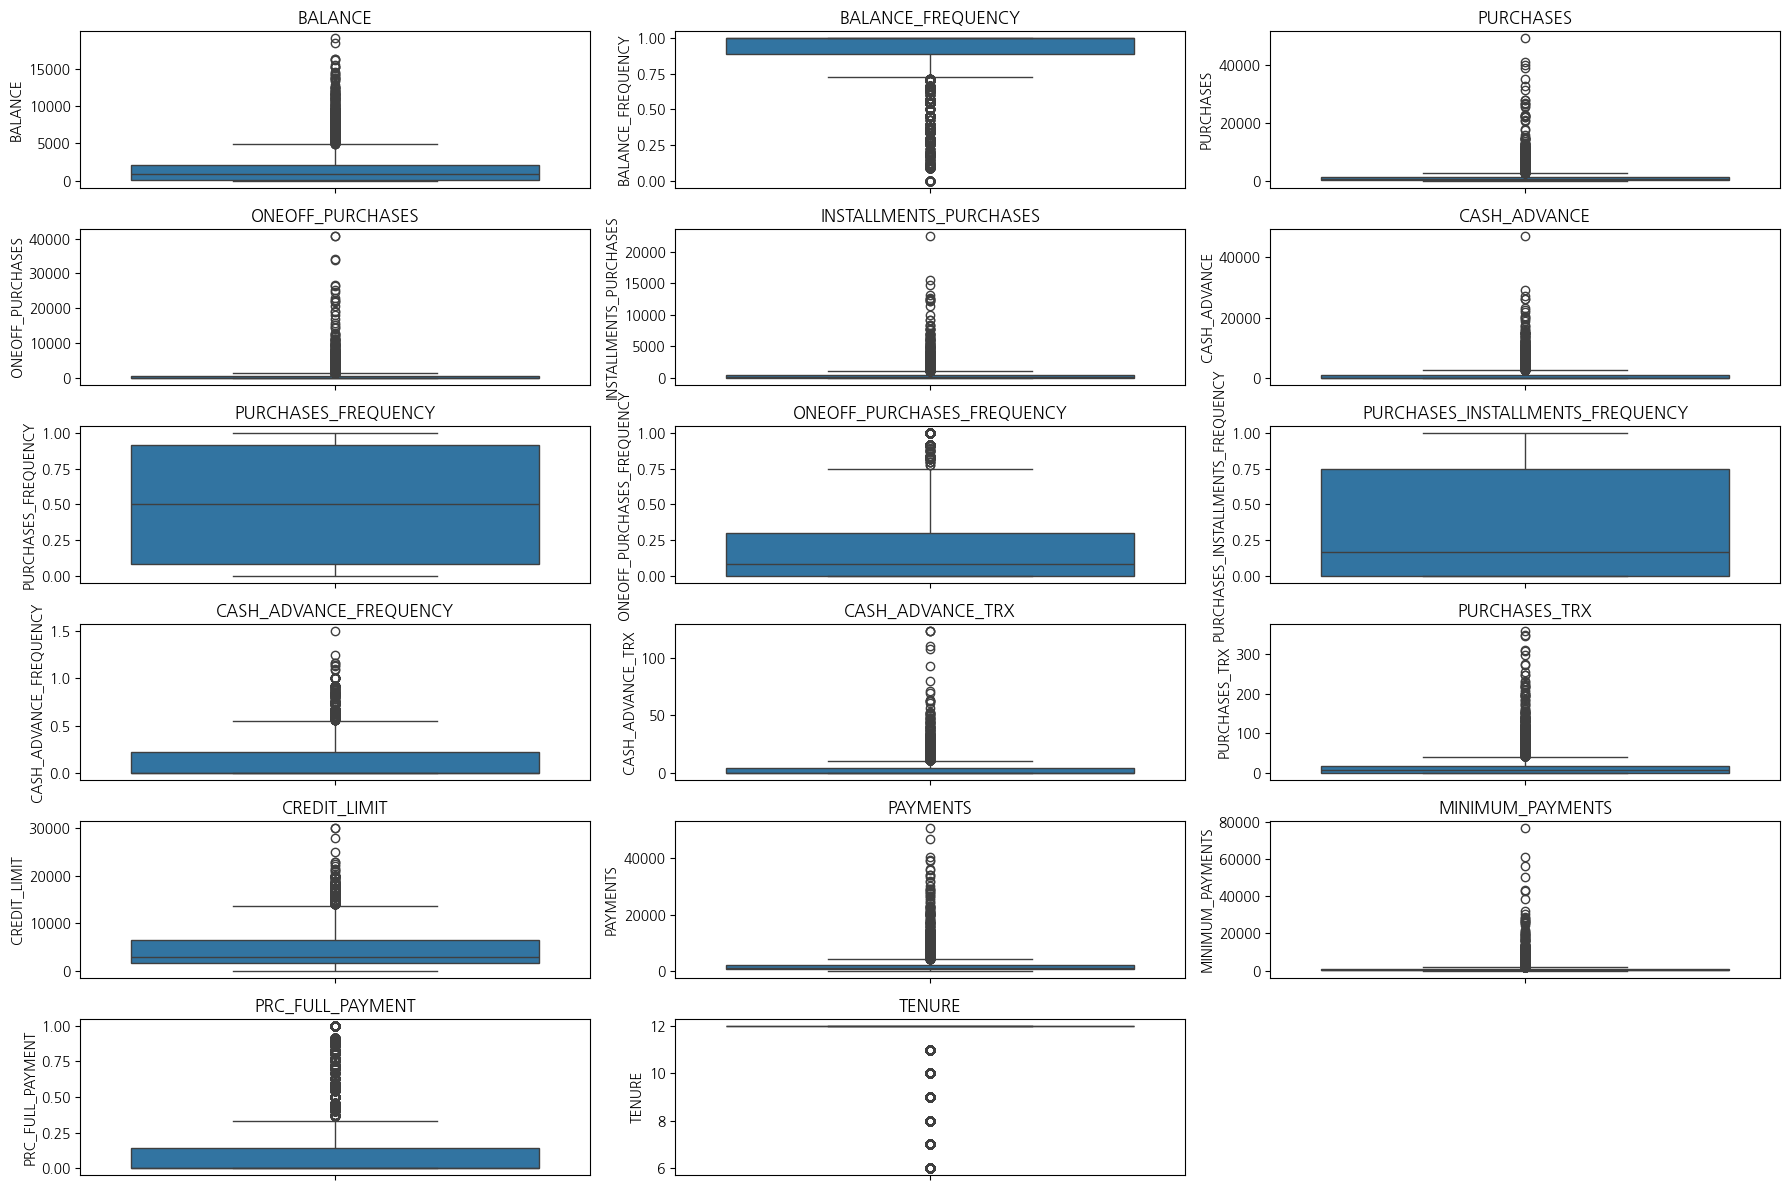

In [9]:
# 박스플롯 확인
plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- IQR기법으로 이상치를 제거하면, 구매금액이 큰 VIP 고객의 데이터가 날라갈 수 있으므로,
    - IQR기법을 사용하지 않음

In [10]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
# 총 구매금액이 일시불 결제 금액보다 작은 경우
data[data['PURCHASES'] < data['ONEOFF_PURCHASES']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5356,C15508,3093.592745,1.000000,47.69,82.41,0.00,1438.951061,0.166667,0.083333,0.000000,0.583333,15,1,4100.0,4591.237633,723.343619,0.0,12
5846,C16010,1906.677710,1.000000,486.27,580.20,0.00,0.000000,0.416667,0.250000,0.000000,0.000000,0,14,2000.0,712.776539,1440.494944,0.0,12
6803,C16991,119.368715,0.909091,339.11,611.65,12.41,87.547315,0.416667,0.500000,0.083333,0.083333,2,5,6500.0,107.203529,187.367893,0.0,12


In [77]:
data.drop(data[data['PURCHASES'] < data['ONEOFF_PURCHASES']].index, inplace=True)
data[data['PURCHASES'] < data['ONEOFF_PURCHASES']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [13]:
# 총 구매금액이 할부 구매 금액보다 작은 경우
data[data['PURCHASES'] < data['INSTALLMENTS_PURCHASES']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
510,C10533,32.042424,0.909091,400.41,0.0,489.39,0.000000,0.833333,0.0,0.750000,0.000000,0,11,4500.0,353.570259,132.131820,0.666667,12
745,C10772,1544.979869,1.000000,880.19,0.0,927.45,0.000000,1.000000,0.0,1.000000,0.000000,0,46,1500.0,1189.503063,1104.152962,0.000000,12
1458,C11506,4.382924,0.272727,130.24,0.0,152.24,0.000000,0.083333,0.0,0.083333,0.000000,0,0,14000.0,28988.973880,1092.184812,0.500000,12
3987,C14099,2552.597938,1.000000,550.62,0.0,583.95,0.000000,1.000000,0.0,0.916667,0.000000,0,24,3000.0,478.632499,1080.350480,0.000000,12
4682,C14810,1089.795044,1.000000,0.00,0.0,20.00,38.249993,0.000000,0.0,0.166667,0.083333,1,1,1200.0,284.731156,331.103830,0.000000,12
5231,C15378,30.692503,0.454545,205.06,0.0,607.76,0.000000,0.916667,0.0,1.000000,0.000000,0,35,4500.0,163.982192,55.660981,0.000000,12
5737,C15897,10243.147630,1.000000,0.00,0.0,66.95,4501.067550,0.000000,0.0,0.083333,0.250000,5,0,13000.0,1882.490974,5624.605818,0.000000,12
5845,C16009,1613.502125,1.000000,65.60,0.0,112.60,0.000000,0.400000,0.0,0.300000,0.000000,0,5,5000.0,390.916581,426.142311,0.000000,10
5967,C16133,954.060867,1.000000,279.76,0.0,578.55,325.076569,0.583333,0.0,0.666667,0.333333,4,14,1000.0,956.028747,1033.373322,0.000000,12
6535,C16714,92.859389,1.000000,468.96,0.0,498.96,0.000000,1.000000,0.0,0.833333,0.000000,0,5,1000.0,348.784045,87.169565,1.000000,6


In [78]:
data.drop(data[data['PURCHASES'] < data['INSTALLMENTS_PURCHASES']].index, inplace=True)
data[data['PURCHASES'] < data['INSTALLMENTS_PURCHASES']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [15]:
# 총 결제금액이 최소 결제금액보다 작은 경우
data[data['PAYMENTS'] < data['MINIMUM_PAYMENTS']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


In [79]:
data.drop(data[data['PAYMENTS'] < data['MINIMUM_PAYMENTS']].index, inplace=True)
data[data['PAYMENTS'] < data['MINIMUM_PAYMENTS']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


## 데이터 EDA

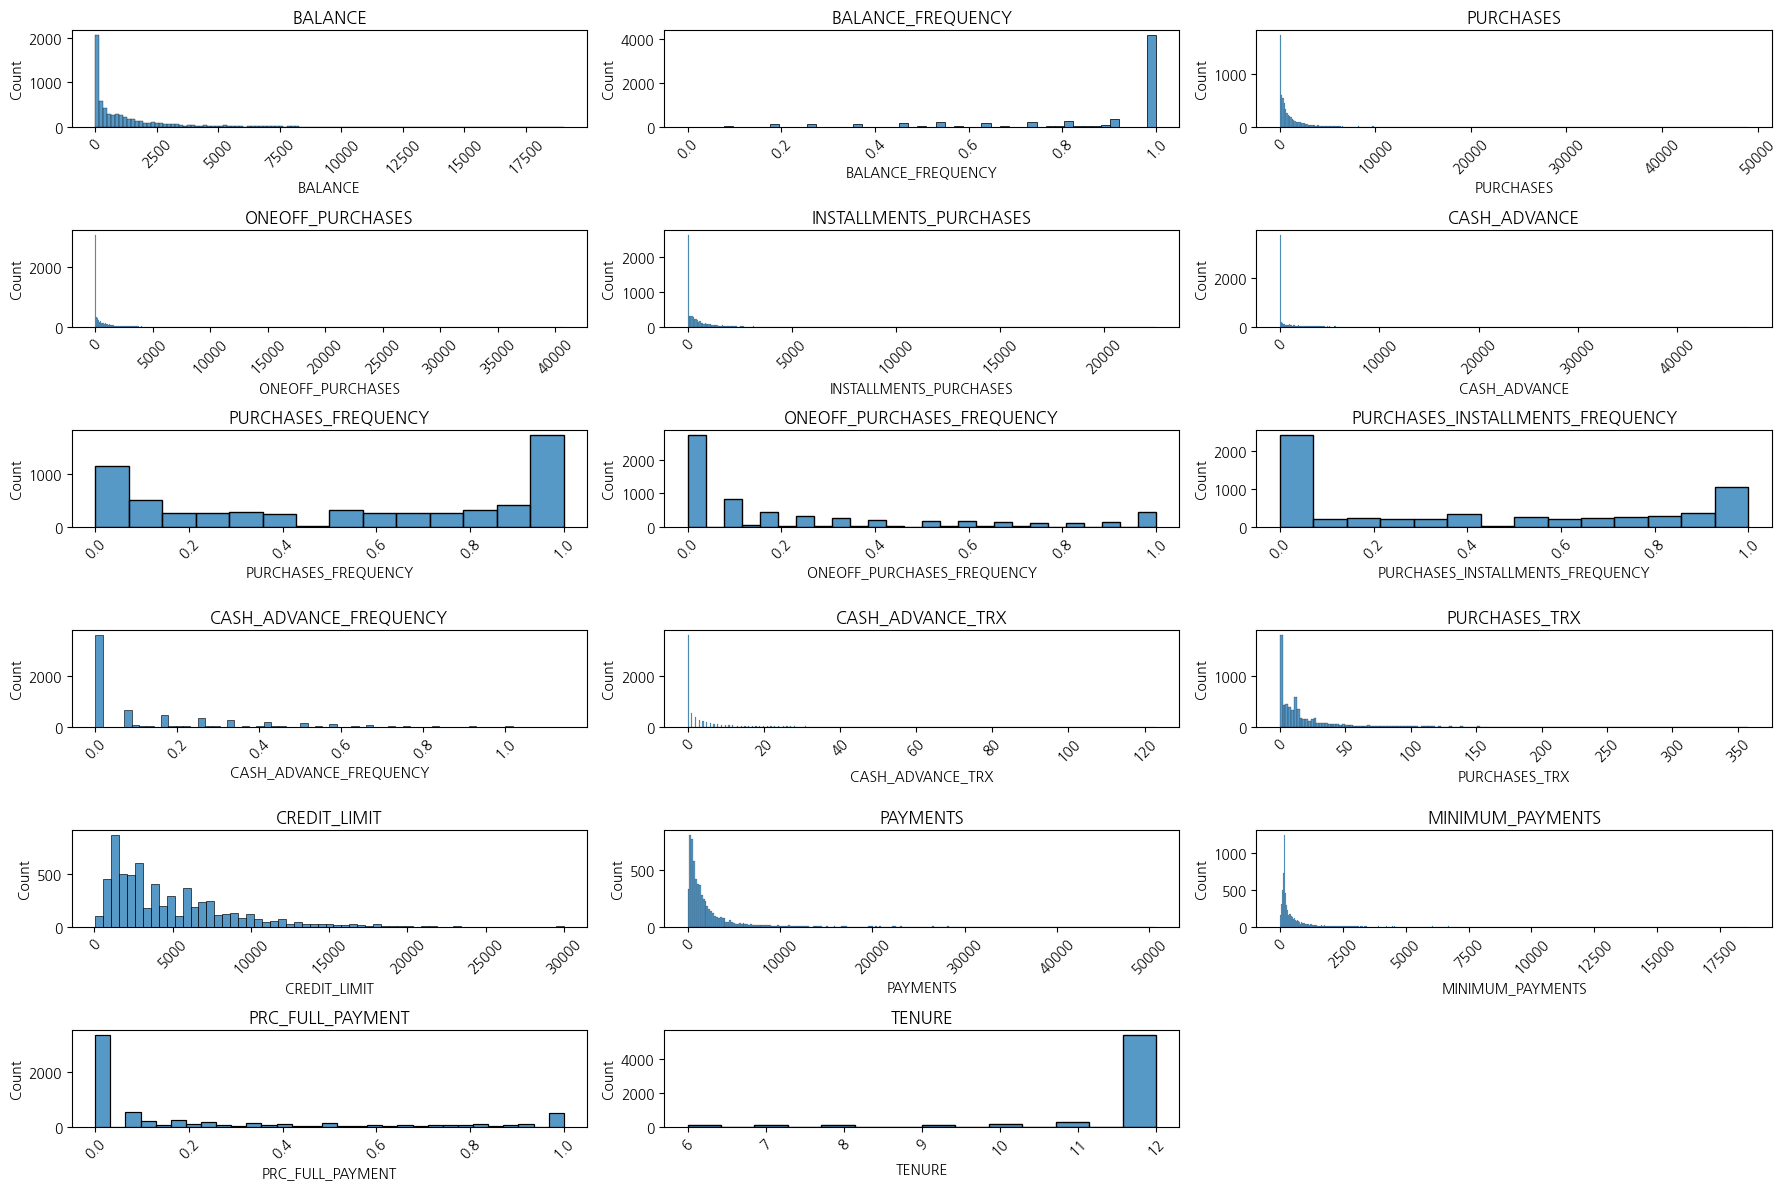

In [17]:
# 히스토그램 확인
plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(data[column])
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 데이터 분석

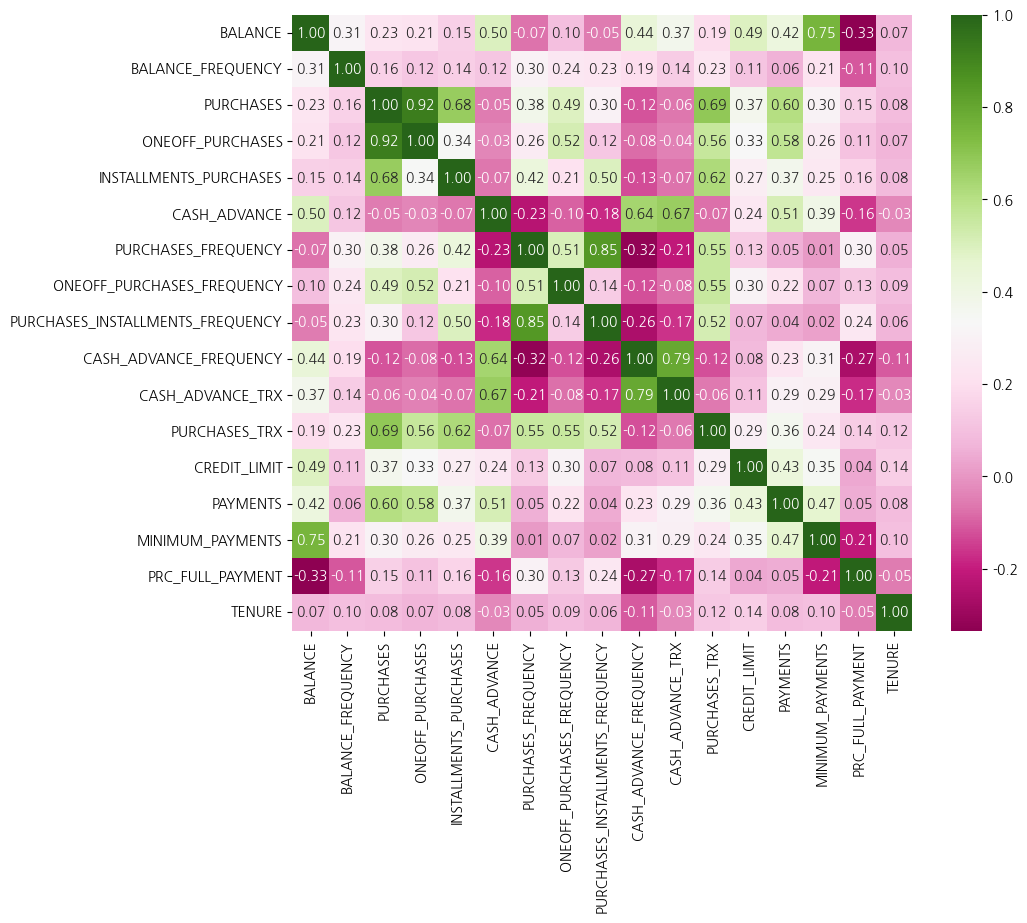

In [19]:
# 상관관계 확인
corr = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='PiYG')
plt.show()

## PCA + Kmeans

In [80]:
df = data[numeric_cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6275 entries, 0 to 8945
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6275 non-null   float64
 1   BALANCE_FREQUENCY                 6275 non-null   float64
 2   PURCHASES                         6275 non-null   float64
 3   ONEOFF_PURCHASES                  6275 non-null   float64
 4   INSTALLMENTS_PURCHASES            6275 non-null   float64
 5   CASH_ADVANCE                      6275 non-null   float64
 6   PURCHASES_FREQUENCY               6275 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6275 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6275 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6275 non-null   float64
 10  CASH_ADVANCE_TRX                  6275 non-null   int64  
 11  PURCHASES_TRX                     6275 non-null   int64  
 12  CREDIT_LIMI

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(6275, 17)

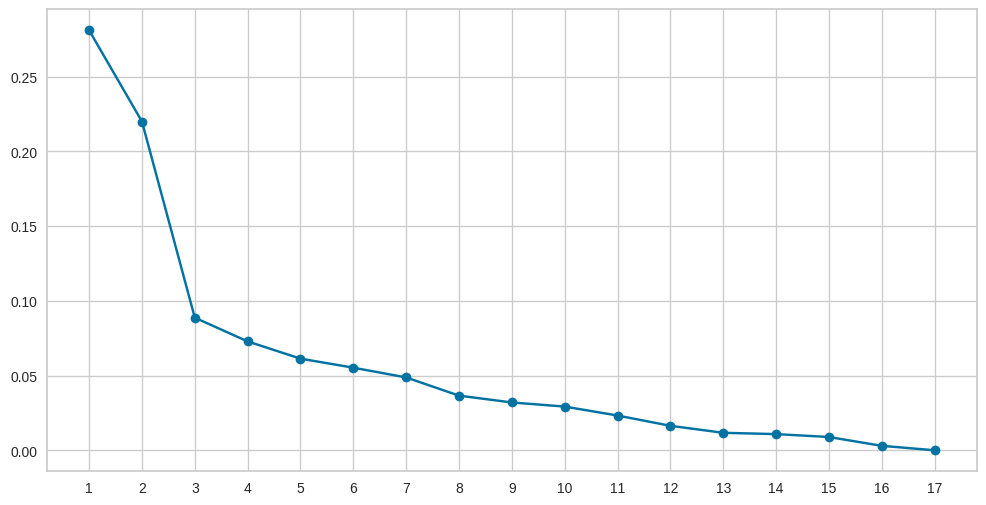

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=17)
pca.fit(df_scaled)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 18), pca.explained_variance_ratio_[:17], marker='o', linestyle='-')
plt.xticks(range(1, 18))

plt.show()

- 적절한 주성분 수 = 3

In [83]:
pca = PCA(n_components=3)
train_df = pca.fit_transform(df_scaled)

In [84]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(
        n_clusters=k
    )
    km.fit(train_df)
    inertia.append(km.inertia_)

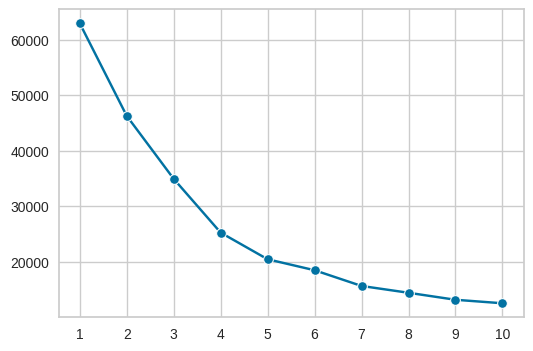

In [85]:
# Elbow 차트 그리기
plt.figure(figsize=(6, 4))
sns.lineplot(x=K_range, y=inertia, marker='o')

plt.xticks(K_range)

plt.show()

- 너무 많은 군집은 분석이 복잡해질 수 있으므로 군집수를 3으로 한다.

In [86]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(train_df)
labels = kmeans_model.labels_
print(labels)

[0 0 0 ... 1 0 1]


In [87]:
data = pd.DataFrame(train_df, columns=['PC1', 'PC2', 'PC3'])
data['cluster'] = kmeans_model.predict(data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


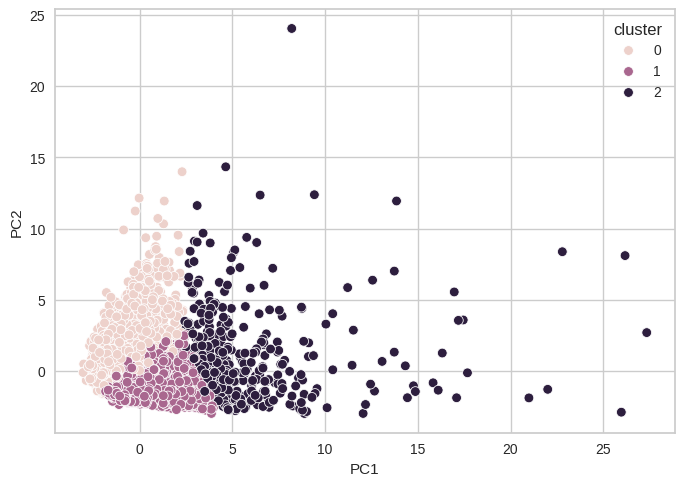

In [88]:
sns.scatterplot(data=data, x='PC1', y='PC2', hue='cluster')
plt.show()

In [89]:
from sklearn import metrics

silhouette = metrics.silhouette_score(data[['PC1', 'PC2', 'PC3']], data['cluster'])
print('Silhouette score:',silhouette)

Silhouette score: 0.3424570459028279


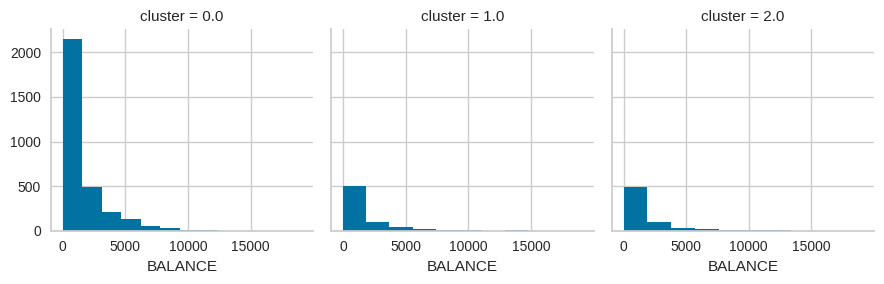

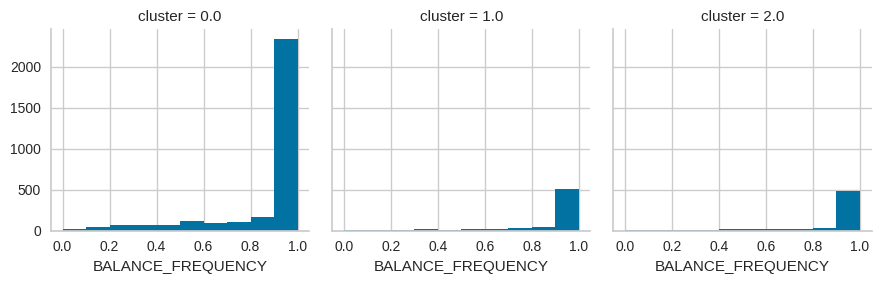

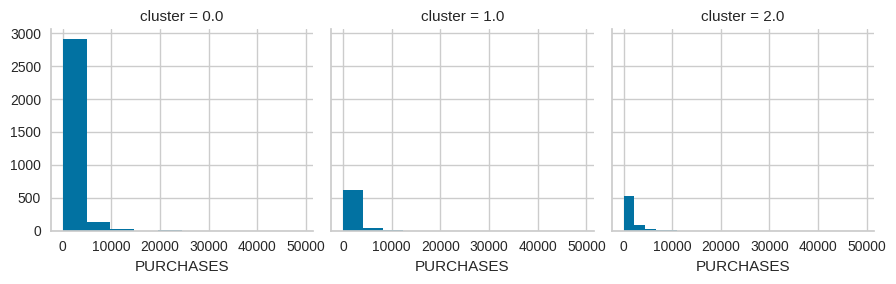

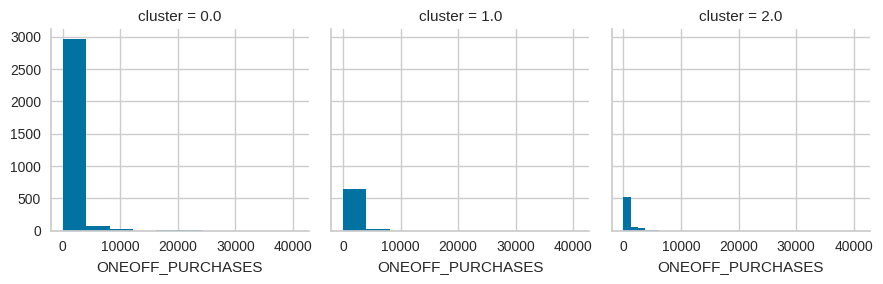

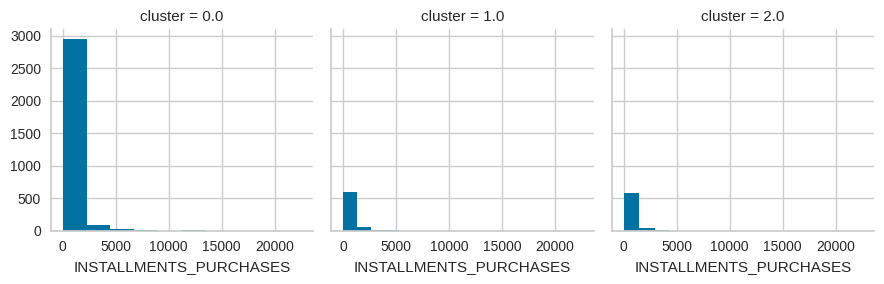

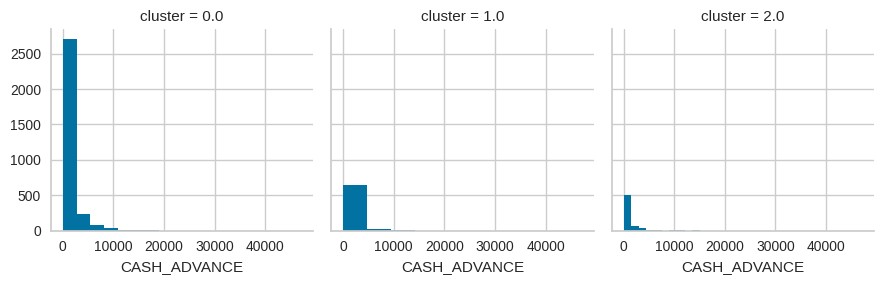

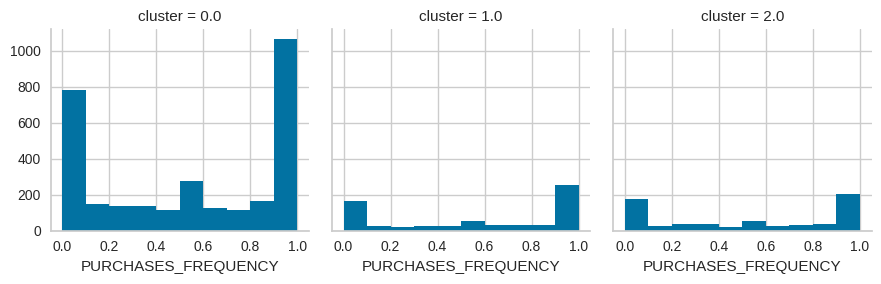

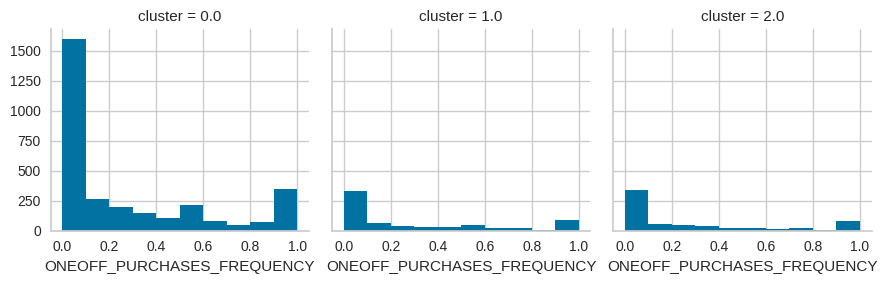

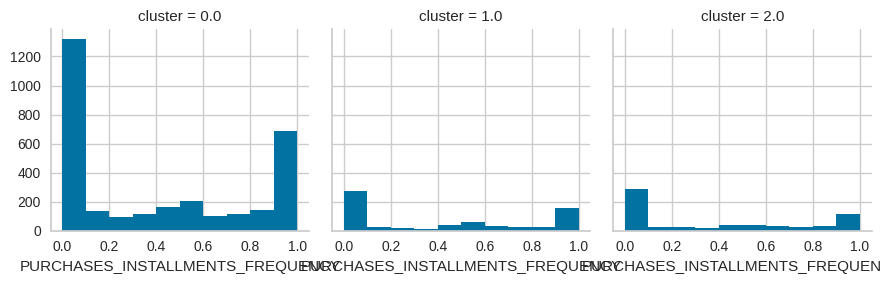

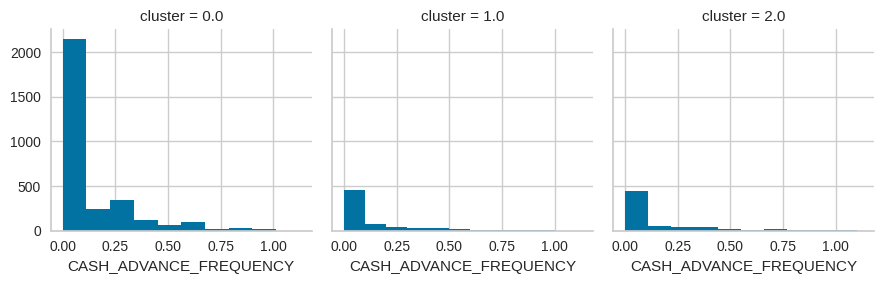

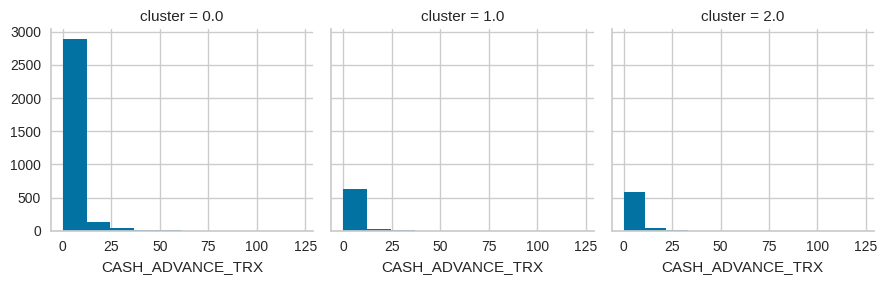

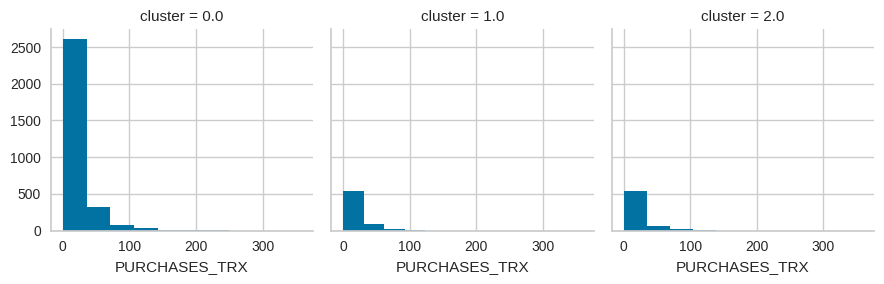

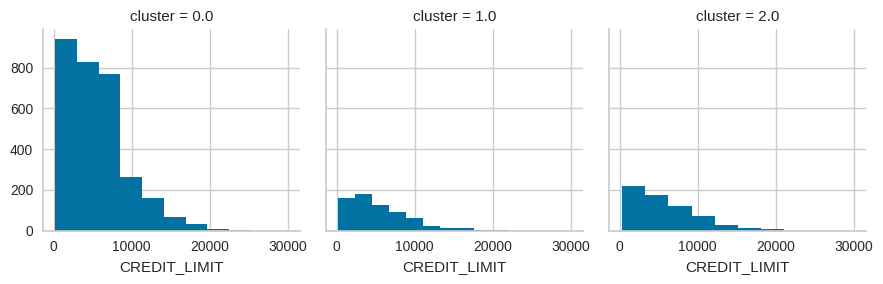

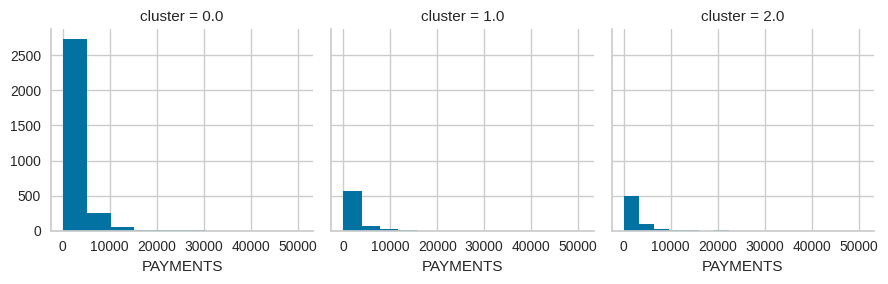

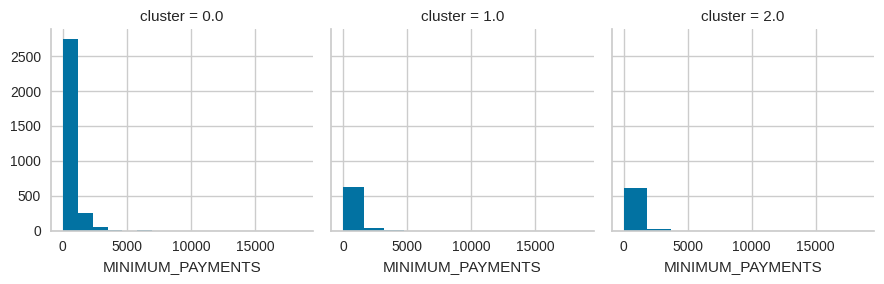

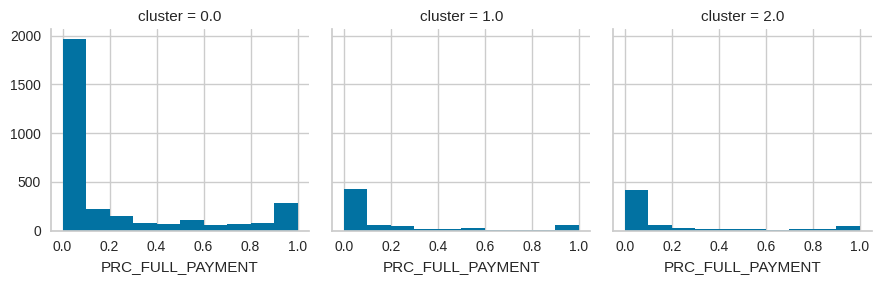

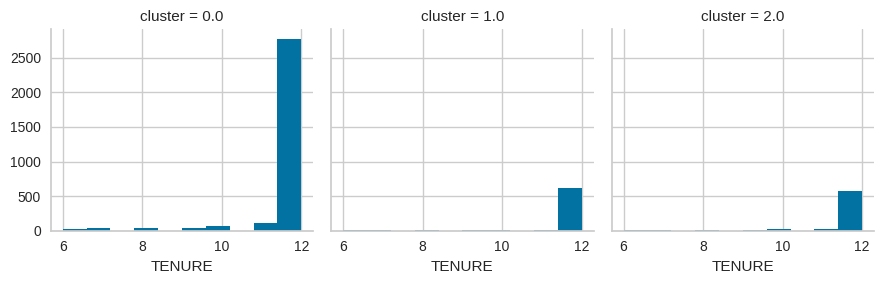

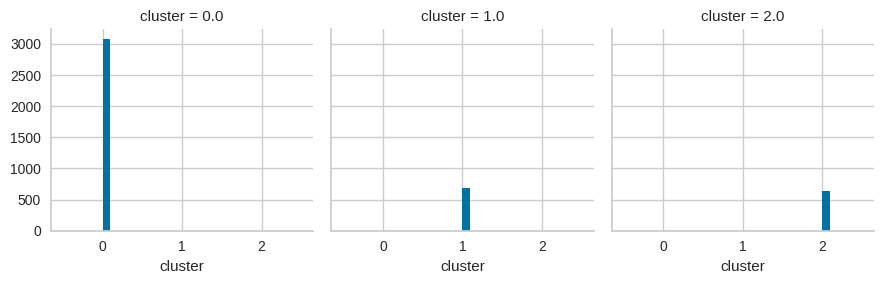

In [65]:
df['cluster'] = data['cluster']
for col in df.columns:
        grid = sns.FacetGrid(df, col='cluster')
        grid.map(plt.hist, col)
plt.show()

클러스터 분석 요약

- Cluster 0: 기본/저활동 고객층
    - 특징
     - BALANCE, PURCHASES, PAYMENTS 등 모든 지출 변수 낮음
     - ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES 거의 없음
     - CASH_ADVANCE도 거의 없음
     - TENURE는 길고, BALANCE_FREQUENCY는 높음

    - 해석
     - 장기 고객이지만 활동이 매우 적음
     - 카드 사용은 거의 안 하지만 계정은 유지


- Cluster 1: 고신용·고소득 적극 사용층
    - 특징
     - BALANCE, PURCHASES, PAYMENTS 등 전반적으로 수치 높음
     - CREDIT_LIMIT도 높고, MINIMUM_PAYMENTS도 많음
     - CASH_ADVANCE도 적당히 사용
     - PURCHASES_FREQUENCY, BALANCE_FREQUENCY도 중상 수준

    - 해석
     - 고소득·고신용 사용자군
     - 할부와 일시불을 모두 적극적으로 활용
     - 카드사에게 수익성이 높은 우수 고객층



- Cluster 2: 일부 사용 고객층
    - 특징
     - Cluster 1보다 낮지만 Cluster 0보단 높음
     - CASH_ADVANCE, ONEOFF_PURCHASES 등 특정 항목만 다소 사용
     - TENURE가 짧은 고객도 일부 있음

    - 해석
     - 신규 고객 혹은 일부 범주의 소비에 집중된 고객
     - 전체적 소비는 적으나 특정 기능 사용률 높음



## 마케팅 전략

- Cluster 0: 기본/저활동 고객층
    - 마케팅 전략
        - 휴면 고객 재활성화 캠페인: 포인트 적립, 캐시백 제공
        - 유지 고객 혜택 강조: 장기 고객 전용 리워드 제공
        - 사용 유도: 자동납부 할인, 월 1회 이상 사용 시 혜택 등

- Cluster 1: 고신용·고소득 적극 사용층
    - 마케팅 전략
        - 프리미엄 카드 업셀링: 혜택 강화된 플래티넘, 인피니트 카드 제안
        - 여행/호텔/항공 마일리지 연계 프로모션
        - 고액 이용자 리워드 프로그램 운영

- Cluster 2: 일부 사용 고객층
    - 마케팅 전략
        - 카드 기능별 맞춤 패키지 추천: 예) 단기 할부 전용 혜택
        - 소비 확장 유도: 추가 이용 시 포인트 적립 강화
        - 온보딩 캠페인: 초반 카드 사용 경험 유도

| 클러스터 | 전략 키워드             | 주요 목적              |
| ---- | ------------------ | ------------------ |
| 0    | **재활성화 · 유지**      | 휴면 고객의 카드 사용 유도    |
| 1    | **프리미엄화 · 리텐션 강화** | 우수 고객 충성도 유지 및 업셀링 |
| 2    | **온보딩 · 소비 확장 유도** | 신규/한정 소비층의 확대 유도   |
